# Exploring log scale plots with Python

## Loading packages

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
#Ajsutando fontes padrão dos gráficos
font = { 'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)
#Ajsutando espessura das linhas padrão dos gráficos
plt.rcParams['lines.linewidth'] = 2;

## Linear scale

### Exemplo em que a escala linear é apropriada:

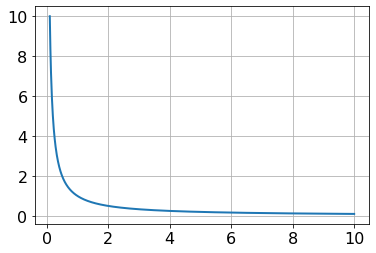

In [3]:
npt = 1000 # numero de pontos
x = np.linspace(1e-1,1e1,npt) #vetor linearmente espaçado
y = 1/x 
plt.plot(x,y)
#grades
plt.grid()
#ajustar a razão de aspecto do eixo
plt.show()

## Algumas dificuldades em visualizar propriedades com a escala linear

### Comparando quantidade com ampla diferença

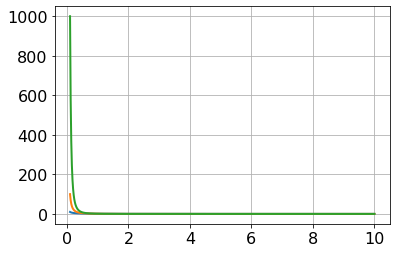

In [4]:
npt = 1000 # numero de pontos
x = np.linspace(1e-1,1e1,npt) #vetor linearmente espaçado
for n in [1,2,3]:
    y = 1/x**n 
    plt.plot(x,y)
#grades
plt.grid()
#ajustar a razão de aspecto do eixo
plt.show()

### Eixo horizontal cobrindo ampla faixa de valores

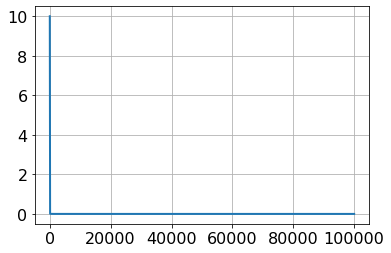

In [5]:
npt = 1000 # numero de pontos
x = np.linspace(1e-1,1e5,npt) #vetor linearmente espaçado
y = 1/x 
plt.plot(x,y)
#grades
plt.grid()
#ajustar a razão de aspecto do eixo
plt.show()

### Fica ainda pior quando se tenta comparar diferentes funções

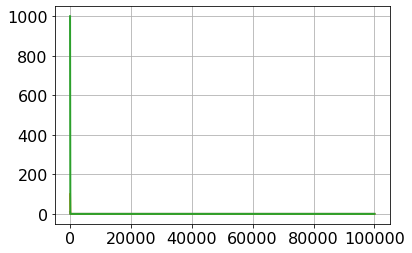

In [6]:
npt = 1000 # numero de pontos
x = np.linspace(1e-1,1e5,npt) #vetor linearmente espaçado
for n in [1,2,3]:
    y = 1/x**n 
    plt.plot(x,y)
#grades
plt.grid()
#ajustar a razão de aspecto do eixo
plt.show()

## How about using the log function to improve this aspect of the visualization?

### The log function

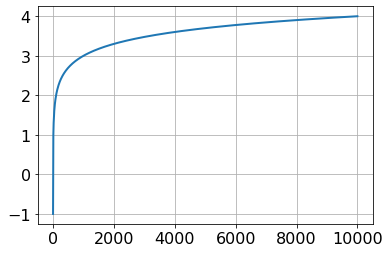

In [7]:
npt = 1000 # numero de pontos
x = np.linspace(1e-1,1e4,npt) #vetor linearmente espaçado
y = np.log10(x)
plt.plot(x,y)
#grades
plt.grid()

### Two ways to plot in log scale:
1. draw an axis with logarithmic spacing: $ x '= \ log10 (x) $
2. perform the variable transformation of the original axis coordinate ($x$) to a new coordinate ($x'$):

$$ x = 10 ^ {x '} $$(eq:log_transformation)

### Determining the position of tickmarks in a log plot

In [8]:
xvec = np.array([0.01, 0.1, 1,10, 100])
xlog_ticks1 = np.log10(xvec)
print('tick position1:',xlog_ticks1)
#------
xvec = 2*np.array([0.01,0.1, 1,10])
xlog_ticks2 = np.log10(xvec)
print('tick position2:',xlog_ticks2)
#------
xvec = 3*np.array([0.01,0.1, 1,10])
xlog_ticks3 = np.log10(xvec)
print('tick position3:',xlog_ticks3)
#------
xvec = 5*np.array([0.01,0.1, 1,10])
xlog_ticks5 = np.log10(xvec)
print('tick position5:',xlog_ticks5)

tick position1: [-2. -1.  0.  1.  2.]
tick position2: [-1.69897 -0.69897  0.30103  1.30103]
tick position3: [-1.52287875 -0.52287875  0.47712125  1.47712125]
tick position5: [-1.30103 -0.30103  0.69897  1.69897]


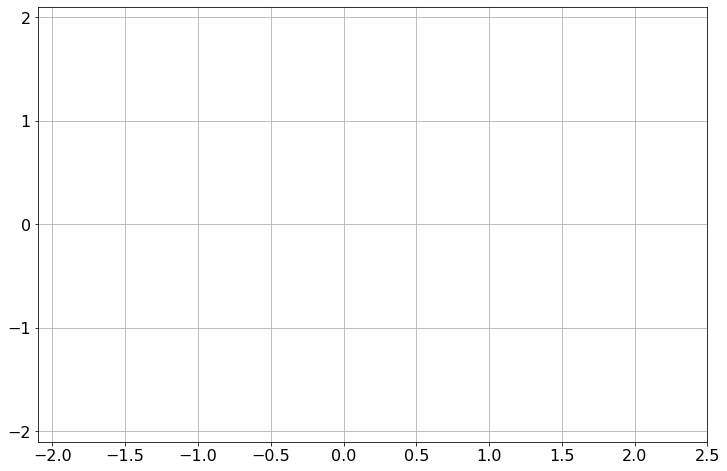

In [9]:
#criando grade do gráfico
fig,ax = plt.subplots(figsize=(12,8))
#
# #pontos na posição dos "ticks" x'=log10(x)
# plt.plot(xlog_ticks1,0*xlog_ticks1,'ro')
# #---
# #linhas na posição dos "ticks" x'=log10(x)
# for x0 in xlog_ticks1:
#     plt.axvline(x0,linestyle='--',color='r')
# #---
# #refinando os ticks  - multiplos de 2
# plt.plot(xlog_ticks2,0*xlog_ticks2,'b*')    
# for x0 in xlog_ticks2:
#     plt.axvline(x0,linestyle='-.',color='b')
# #--
# #refinando os ticks  - multiplos de 3
# plt.plot(xlog_ticks3,0*xlog_ticks3,'g*')    
# for x0 in xlog_ticks3:
#     plt.axvline(x0,linestyle='-.',color='g')
# #--
# #refinando os ticks  - multiplos de 5
# plt.plot(xlog_ticks5,0*xlog_ticks3,'m*')   
# for x0 in xlog_ticks5:
#     plt.axvline(x0,linestyle='-.',color='m')
#--------
#formatacao
#grades
plt.grid()
xrange, yrange = 2,2
xstep, ystep = 0.5,1
plt.xlim([-xrange-0.1,xrange+0.1])
plt.ylim([-yrange-0.1,yrange+0.1])
plt.xticks(np.arange(-xrange,xrange+1,xstep))
plt.yticks(np.arange(-yrange,yrange+1,ystep))
plt.show()

### Generating markers and annotations

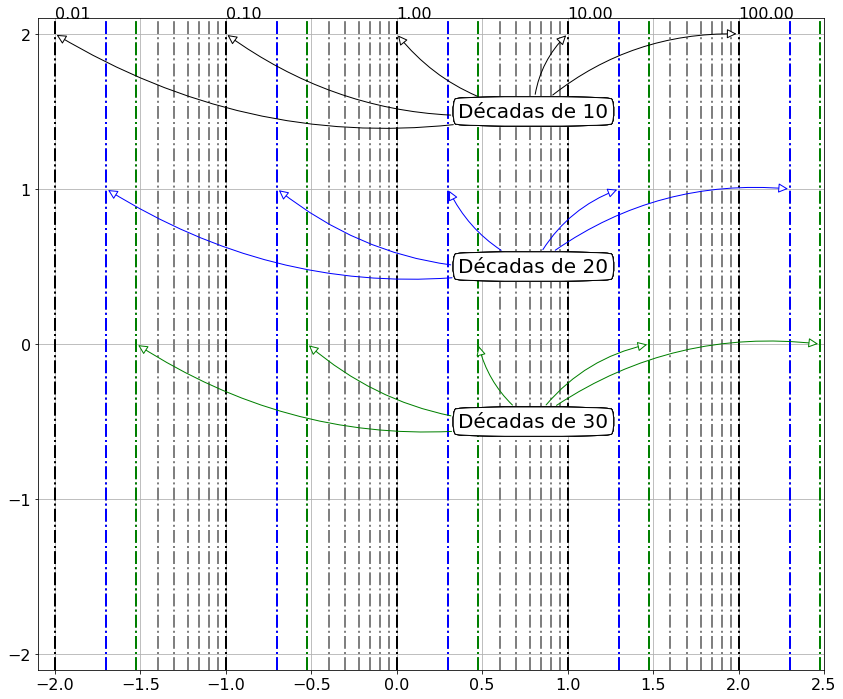

In [10]:
#criando grade do gráfico
fig,ax = plt.subplots(figsize=(12,10))
#
#pontos na posição dos "ticks" x'=log10(x)

#---
xvec = np.array([0.01, 0.1, 1,10, 100])
#linhas na posição dos "ticks" x'=log10(x)
for multiplo in [1,2,3,4,5,6,7,8,9]:
    xlog_ticks = np.log10(multiplo*xvec)
    x_ticks = multiplo*xvec
    #-verticais
    for x0,xlin in zip(xlog_ticks,x_ticks):
        plt.axvline(x0,linestyle='-.',color='gray')
#-----------------
#decadas de  10
for multiplo in [1,]:
    xlog_ticks = np.log10(multiplo*xvec)
    x_ticks = multiplo*xvec
    #-verticais
    for x0,xlin in zip(xlog_ticks,x_ticks):
        plt.axvline(x0,linestyle='-.',color='k')
    #-verticais
    for x0,xlin in zip(xlog_ticks,x_ticks):
        ax.annotate('{:0.2f}'.format(10**(x0)), xy=(x0, 2.1),) 
        ann1 = ax.annotate("Décadas de 10",
                  xy=(x0, 2), xycoords='data',
                  xytext=(0.8,1.5), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w"),
                  )
#-----------------
#decadas de  20
for multiplo in [2,]:
    xlog_ticks = np.log10(multiplo*xvec)
    x_ticks = multiplo*xvec
    for x0,xlin in zip(xlog_ticks,x_ticks):
        plt.axvline(x0,linestyle='-.',color='b')
    #-verticais
    for x0,xlin in zip(xlog_ticks,x_ticks):
        ann1 = ax.annotate("Décadas de 20",
                  xy=(x0, 1), xycoords='data',
                  xytext=(0.8,0.5), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w",color='blue'),
                  )
#-----------------
#decadas de  30
for multiplo in [3,]:
    xlog_ticks = np.log10(multiplo*xvec)
    x_ticks = multiplo*xvec
    for x0,xlin in zip(xlog_ticks,x_ticks):
        plt.axvline(x0,linestyle='-.',color='g')
    #-verticais
    for x0,xlin in zip(xlog_ticks,x_ticks):
        ann1 = ax.annotate("Décadas de 30",
                  xy=(x0, 0), xycoords='data',
                  xytext=(0.8,-0.5), textcoords='data',
                  size=20, va="center", ha="center",
                  bbox=dict(boxstyle="round4", fc="w"),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=-0.2",
                                  fc="w",color='g'),
                  )
#--------
#formatacao
#grades
plt.grid()
xrange, yrange = 2,2
xstep, ystep = 0.5,1
plt.xlim([-xrange-0.1,xrange+0.1])
plt.ylim([-yrange-0.1,yrange+0.1])
plt.xticks(np.arange(-xrange,xrange+1,xstep))
plt.yticks(np.arange(-yrange,yrange+1,ystep))
plt.tight_layout()
plt.show()

### Exemplo com eixo x (using `plt.semilogx()`):
$x'=\log_{10}(x)$

Object `plt.grid()` not found.


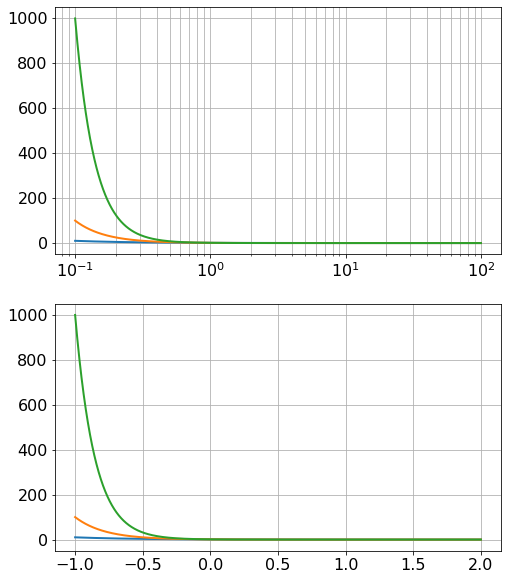

In [11]:
fig,ax = plt.subplots(2,1,figsize=(8,10))
#---------------------------------
#METODO 1, RECOMENDADO, USE AS FUNÇÕES SEMILOGX OU SEMILOGY OU LOGLOG
npt = 100000 # numero de pontos
xmin = 1e-1
xmax = 1e2
x = np.linspace(1e-1,1e2,npt) #vetor linearmente espaçado
ax0 = ax[0]
for n in [1,2,3]:
    y = 1/x**n 
    ax0.semilogx(x,y)
#----------------------------------
#METODO 2, RECOMENDADO, USE AS FUNÇÕES SEMILOGX OU SEMILOGY OU LOGLOG
npt = 100000 # numero de pontos
x1min = np.log10(xmin)
x1max = np.log10(xmax)
x1 = np.linspace(x1min,x1max,npt) #vetor linearmente espaçado na coordenada x1
ax0 = ax[1]
for n in [1,2,3]:
    y = 1/10**(n*x1)
    ax0.plot(x1,y)
#grades
ax[0].grid(True,which='Both')
ax[1].grid()
plt.show()

### Exemplo com eixo y (using `plt.semilogy()`)
$y'=\log_{10}(y)$

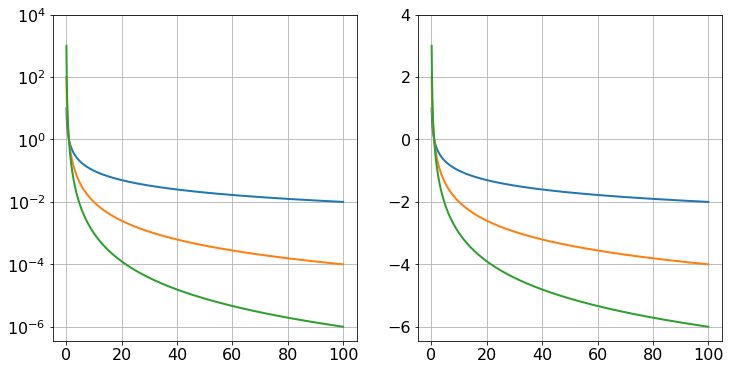

In [12]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
#---------------------------------
#METODO 1, RECOMENDADO, USE AS FUNÇÕES SEMILOGX OU SEMILOGY OU LOGLOG
npt = 100000 # numero de pontos
xmin = 1e-1
xmax = 1e2
x = np.linspace(1e-1,1e2,npt) #vetor linearmente espaçado
ax0 = ax[0]
for n in [1,2,3]:
    y = 1/x**n 
    ax0.semilogy(x,y)
ax0.set_yticks([1e-6,1e-4,1e-2,1,1e2,1e4])
#----------------------------------
#METODO 1, RECOMENDADO, USE AS FUNÇÕES SEMILOGX OU SEMILOGY OU LOGLOG
npt = 100000 # numero de pontos
# x1min = 10**(xmin)
# x1max = 10**(xmax)
ax0 = ax[1]
for n in [1,2,3]:
    y1 = -n*np.log10(x) 
    ax0.plot(x,y1)
ax0.set_yticks([-6,-4,-2,0,2,4])
#grades
ax[0].grid()
ax[1].grid()
plt.show()

### Examples with two axes, x,y (using `plt.loglog()`):
$x'=\log_{10}(x)$

$y'=\log_{10}(y)$

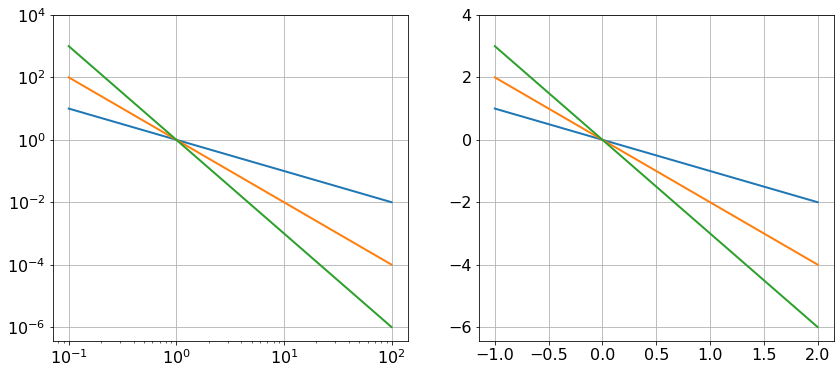

In [13]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
#---------------------------------
#METODO 1, RECOMENDADO, USE AS FUNÇÕES SEMILOGX OU SEMILOGY OU LOGLOG
npt = 100000 # numero de pontos
xmin = 1e-1
xmax = 1e2
x = np.linspace(1e-1,1e2,npt) #vetor linearmente espaçado
ax0 = ax[0]
for n in [1,2,3]:
    y = 1/x**n 
    ax0.loglog(x,y)
ax0.set_yticks([1e-6,1e-4,1e-2,1,1e2,1e4])
#----------------------------------
#METODO 1, RECOMENDADO, USE AS FUNÇÕES SEMILOGX OU SEMILOGY OU LOGLOG
npt = 100000 # numero de pontos
x1min = np.log10(xmin)
x1max = np.log10(xmax)
x1 = np.linspace(x1min,x1max,npt) #vetor linearmente espaçado na coordenada x1
ax0 = ax[1]
for n in [1,2,3]:
    y1 = -n*x1
    ax0.plot(x1,y1)
ax0.set_yticks([-6,-4,-2,0,2,4])
#grades
ax[0].grid()
ax[1].grid()
plt.show()

### Linearization examples
It is also possible to directly transform the variables to a log scale using  {eq}`eq:log_transformation` , and use the regular `plt.plot()` function. It is **important**, however, to pay attention to the following issues:
* Do not take logarithm of null or negative quantities, they will either diverge or result in complex numbers
* Make sure you have dimensionless quantities before taking the log scale, otherwise you end up with meaningless units, such as $\log(Hz)$.

For example, if the axis $x$ to be transformed is in units of $[m]$, before using {eq}`eq:log_transformation` you can pick an appropriate reference value, say $1 m$ and normalize your axis relative to that: $x\rightarrow\frac{x}{1m}$. The label of your axis in this case would be $\log(\frac{x}{m})$. For instance, after normalization, if a given point along the transformed axis ($x`=\log(x)$) has a value of $x'=3.2'$, then $\frac{x}{m}=10^{3.2}\approx1584.9$ and $x\approx1584.9m$.

### a) Seja $y(x)=x$. Qual a inclinação da reta em escala log?

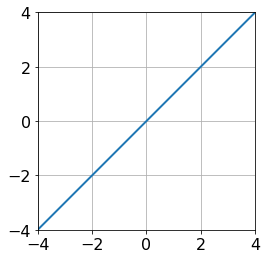

In [14]:
npt = 1000 # numero de pontos
x = np.linspace(1e-4,1e4,npt) #vetor linearmente espaçado
y = x
#
xlog = np.log10(x)
ylog = np.log10(y)
#
plt.plot(xlog,ylog)
#grades
plt.grid()
#ajustar a razão de aspecto do eixo
plt.ylim([-4,4])
plt.xlim([-4,4])
ax = plt.gca()
ax.set_aspect(aspect=1)
plt.show()

### b) Seja $y(x)=x^{-1}$. Qual a inclinação da reta em escala log?

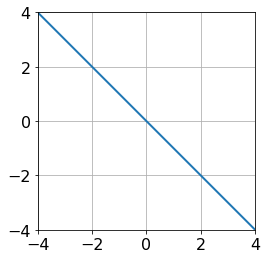

In [15]:
npt = 1000 # numero de pontos
x = np.linspace(1e-4,1e4,npt) #vetor linearmente espaçado
y = 1/x
#
xlog = np.log10(x)
ylog = np.log10(y)
#
plt.plot(xlog,ylog)
#grades
plt.grid()
#ajustar a razão de aspecto do eixo
plt.ylim([-4,4])
plt.xlim([-4,4])
ax = plt.gca()
ax.set_aspect(aspect=1)
plt.show()

## b) What happens when the polynomial has other powers? i.e., $ y(x) = x^n $

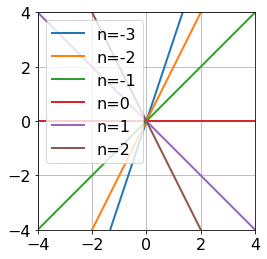

In [16]:
npt = 1000 # numero de pontos
x = np.linspace(1e-4,1e4,npt) #vetor linearmente espaçado
#---
for n in range(-3,3):
    y = 1/x**n # n é a potência do polinômia
    #
    xlog = np.log10(x)
    ylog = np.log10(y)
    #
    plt.plot(xlog,ylog,'-',label='n={:1}'.format(n))
#grades
plt.grid()
#ajustar a razão de aspecto do eixo
plt.ylim([-4,4])
plt.xlim([-4,4])
ax = plt.gca()
ax.set_aspect(aspect=1)
plt.legend(loc='best')
plt.show()

É importante usar espaçamento logarítmico dos pontos!